# Laboratory Session 03 : April 14, 2022


## Exercises due on : May 1, 2022

## Student: Capodaglio Alessandro Maria
## ID: 2039109

# Exercise 1

## The triangular distribution takes on the form: 

### $$f(x)=\begin{cases}
\frac{2(x-a)}{(b-a)(c-a)} & a \leq x < c \\
\frac{2(b-x)}{(b-a)(b-c)} & c \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$
## where $c \in [a,b]$.

###  a) Plot the triangular distribution given the interval (a, b).
### b) and write an algorithm to generate random numbers from the triangular distribution
### c) generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

In [1]:
library("GoFKernel")
library("ggplot2")
options(warn=-1)

#Inputtable parameters of the distribution
a <- -5 
b <- 8
c <- 2

d_tri <- function(x, a, b, c){
    res <- ifelse( (x >= a & x < c), (2*(x-a))/((b-a)*(c-a)), ifelse(x >= c & x <= b, 2*(b-x)/((b-a)*(b-c)), 0))
    return (res)
}
d_tri <- Vectorize(d_tri)

p_tri <- function(x, a, b, c) {
    cum_res <- ifelse( (x>a & x<=b), integrate(d_tri,a,x, a = a, b = b, c = c)$value, ifelse(x <= a, 0, 1) )
    return (cum_res)
}
p_tri <- Vectorize(p_tri)

### For the random number generation I couldn't repeat what I did in the previous set of exercises because
# of particularities in the GoFKernel library. The inverse function in it doesn't accept functions with variable 
# parameters, so in a baroque attempt (and success) I just put everything in a bigger function. 
r_tri <- function(N, a, b, c){
            x <- seq(a,b, (b-a)/2000)
            pdf <- function(x){ifelse((x>a & x<c),                   
                                  (2*(x-a))/((b-a)*(c-a)),
                                  ifelse((x>=c & x<b),
                                        (2*(b-x))/((b-a)*(b-c)),
                                        0)
                                  )
                               } 
            cdf <- function(x){ifelse((x>a & x<b),
                                   integrate(pdf,a,x)$value,
                                   ifelse(x <= a, 0, 1)
                                      )
                                }                                                                       
            u <- runif(N)
            r <- Vectorize(inverse(cdf, a, b))                   
            return(r(u))
    
} 


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



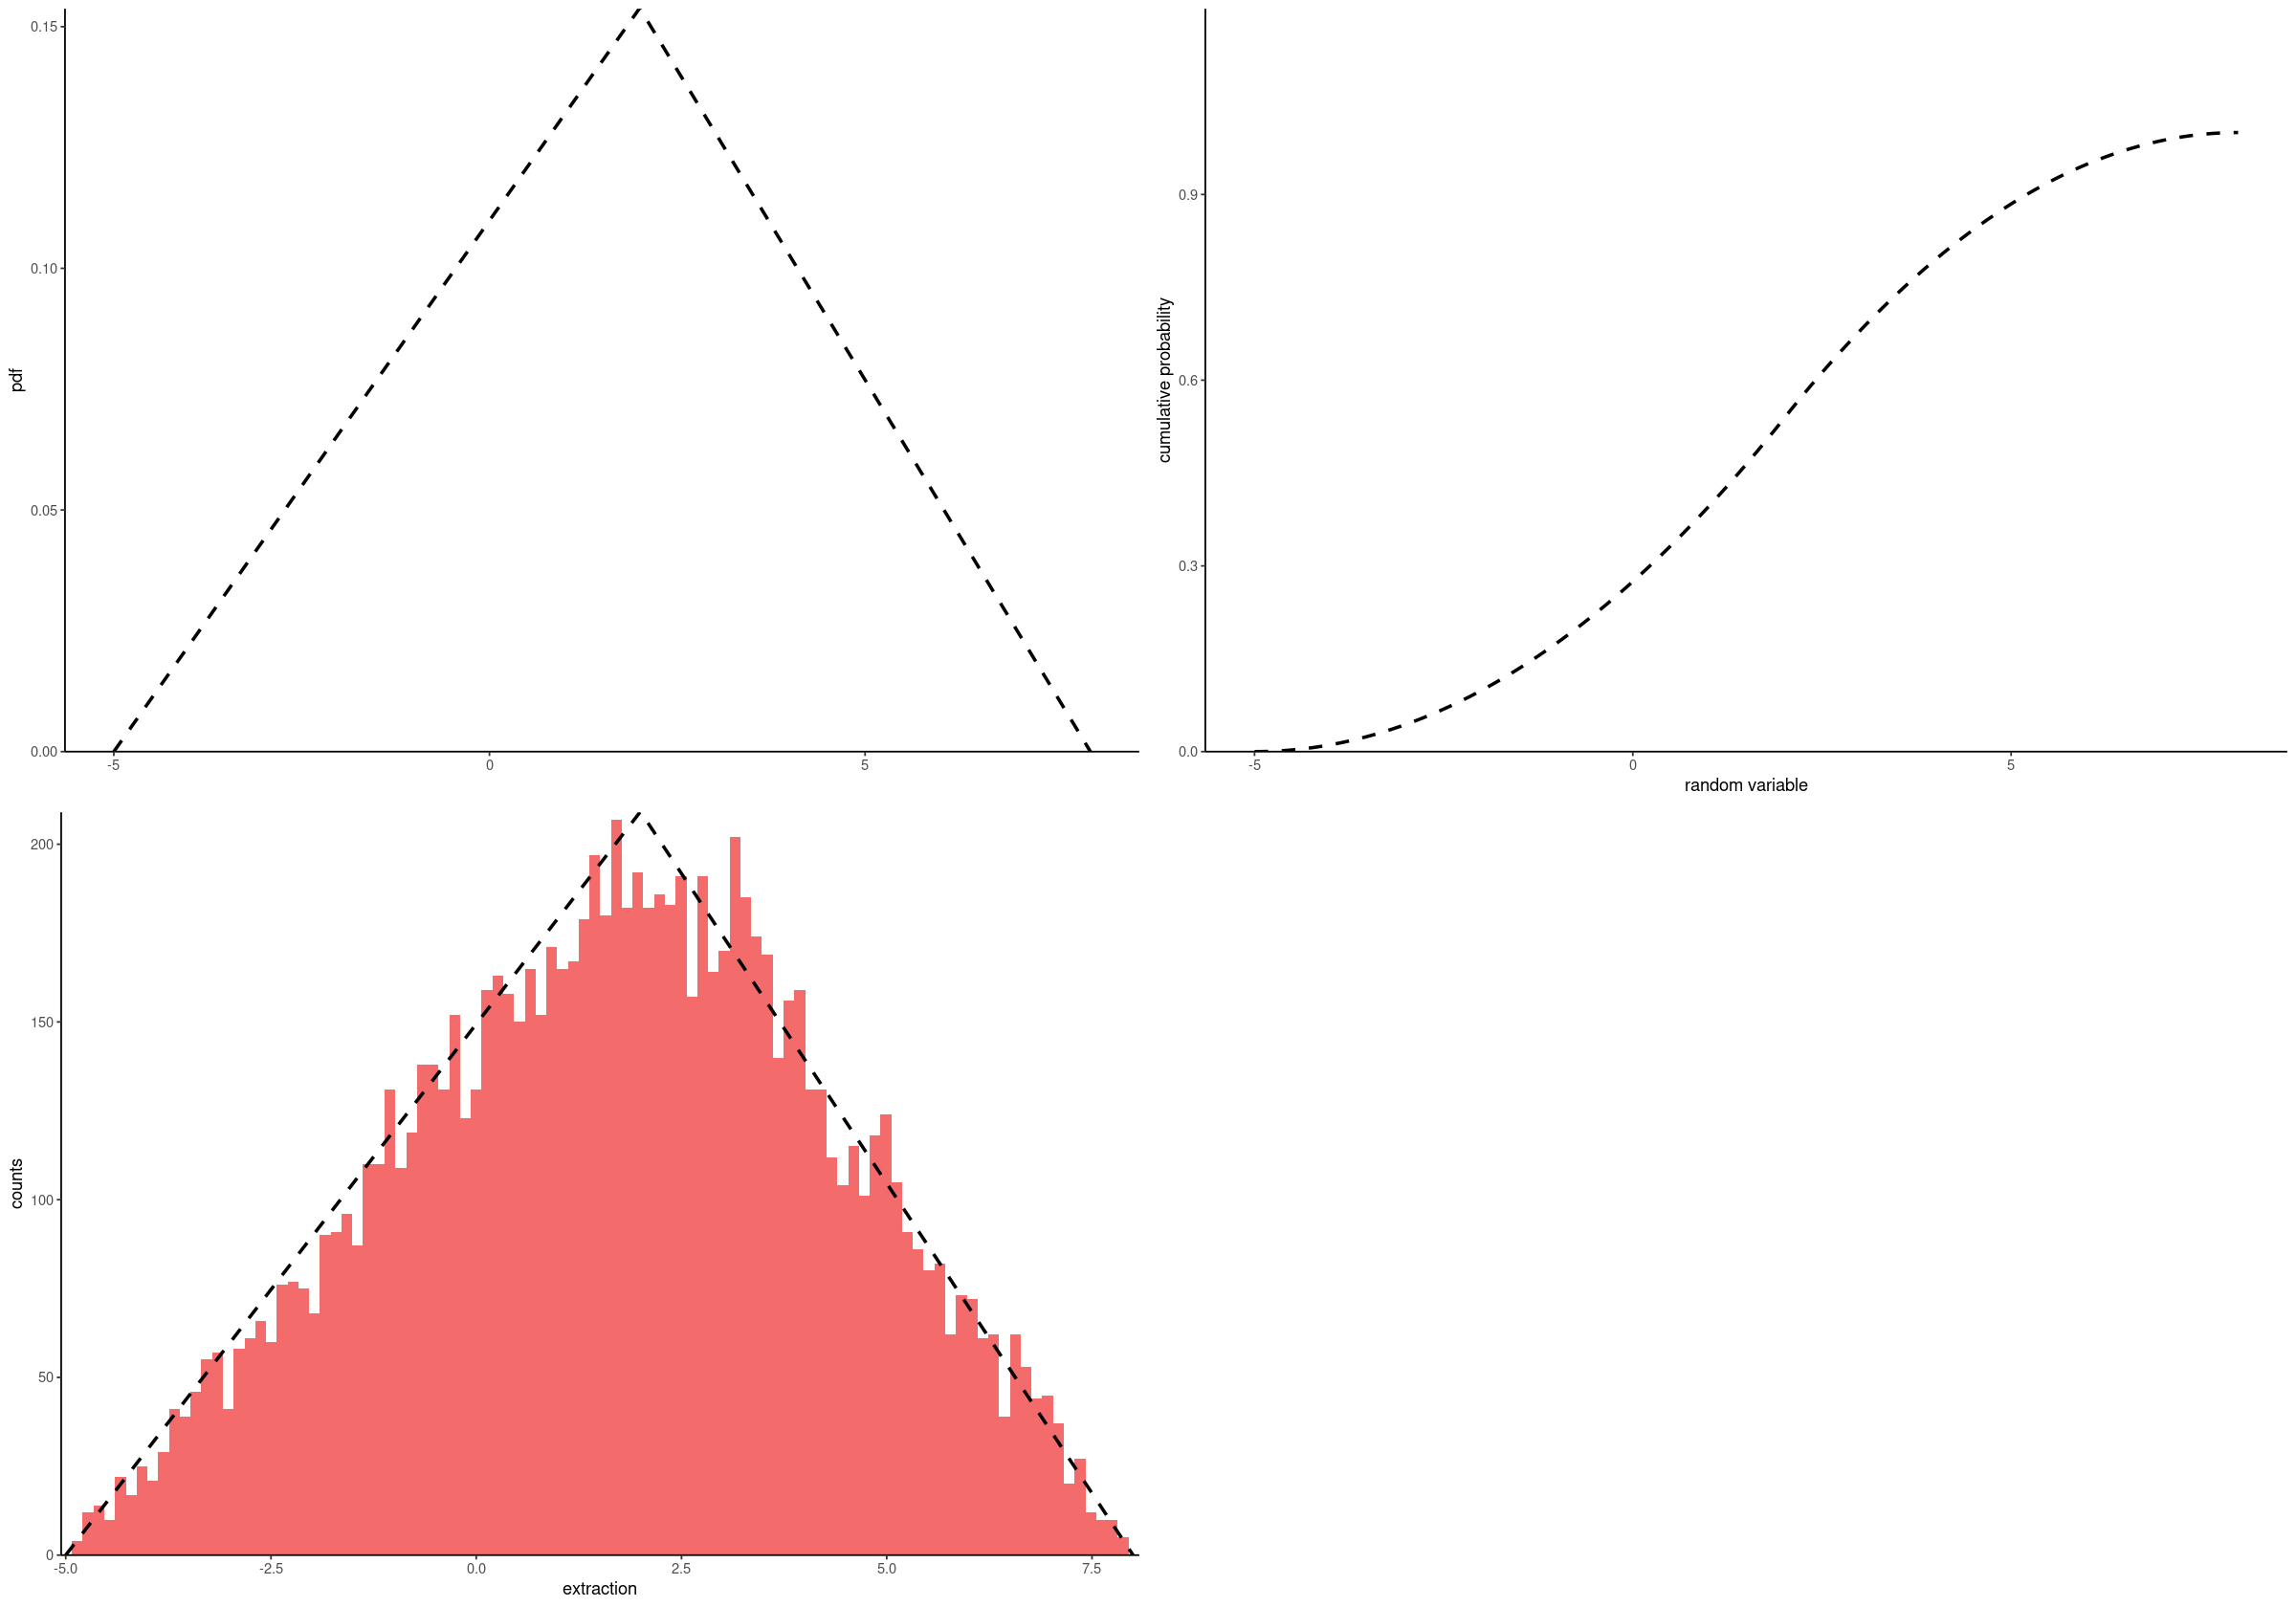

In [2]:
library("ggpubr")


x <- seq(a,b, (b-a)/1000)


df_tri  <- data.frame(x, d_tri(x, a, b, c), p_tri(x,a,b,c))
df_r <- data.frame(r_tri(10000, a,b,c))

options(repr.plot.width=20, repr.plot.height=14)


pdf_plot_tri <- ggplot(df_tri, aes(x=x, y= df_tri[,2])) +
            geom_line(color= 'black', linetype ='dashed', size = 1) +
            theme_classic()+
            scale_x_continuous(name= "", expand = c(0.05, 0))+
            scale_y_continuous(name= "pdf", expand = c(0, 0)) +
            expand_limits(y=0)



cdf_plot_tri <- ggplot(df_tri, aes(x=x, y = df_tri[,3])) +
            geom_line(color= 'black', linetype ='dashed', size = 1) +
            theme_classic()+
            scale_x_continuous(name= "random variable", expand = c(0.05, 0))+
            scale_y_continuous(name= "cumulative probability", expand = c(0, 0), limits = c(0, 1.2)) +
            expand_limits(y=0)



tri_hist <- ggplot(data = df_r, mapping = aes(x = df_r[,1]), color='purple') +
            geom_histogram(fill='firebrick 2', alpha = 0.7, bins = 100)+
            theme_classic()+
            scale_x_continuous(name= '',expand = c(0, 0))+
            scale_y_continuous(expand = c(0, 0))

#multiplicative factor that normalizes the imposed pdf
fac <- max(ggplot_build(tri_hist)$data[[1]]$count)/max(df_tri[,2])


tri_hist <- ggplot(data = df_r, mapping = aes(x = df_r[,1]), color='purple') +
            geom_histogram(fill='firebrick 2', alpha = 0.7, bins = 100)+
            geom_line(data = df_tri, mapping = aes(x=x, y= df_tri[,2]*fac), color= 'black', linetype ='dashed', size = 1) + 
            theme_classic()+
            scale_x_continuous(name= 'extraction',expand = c(0, 0))+
            scale_y_continuous(name = 'counts', expand = c(0, 0))



ggarrange(pdf_plot_tri, cdf_plot_tri, tri_hist, nrow = 2, ncol = 2)






# Exercise 2

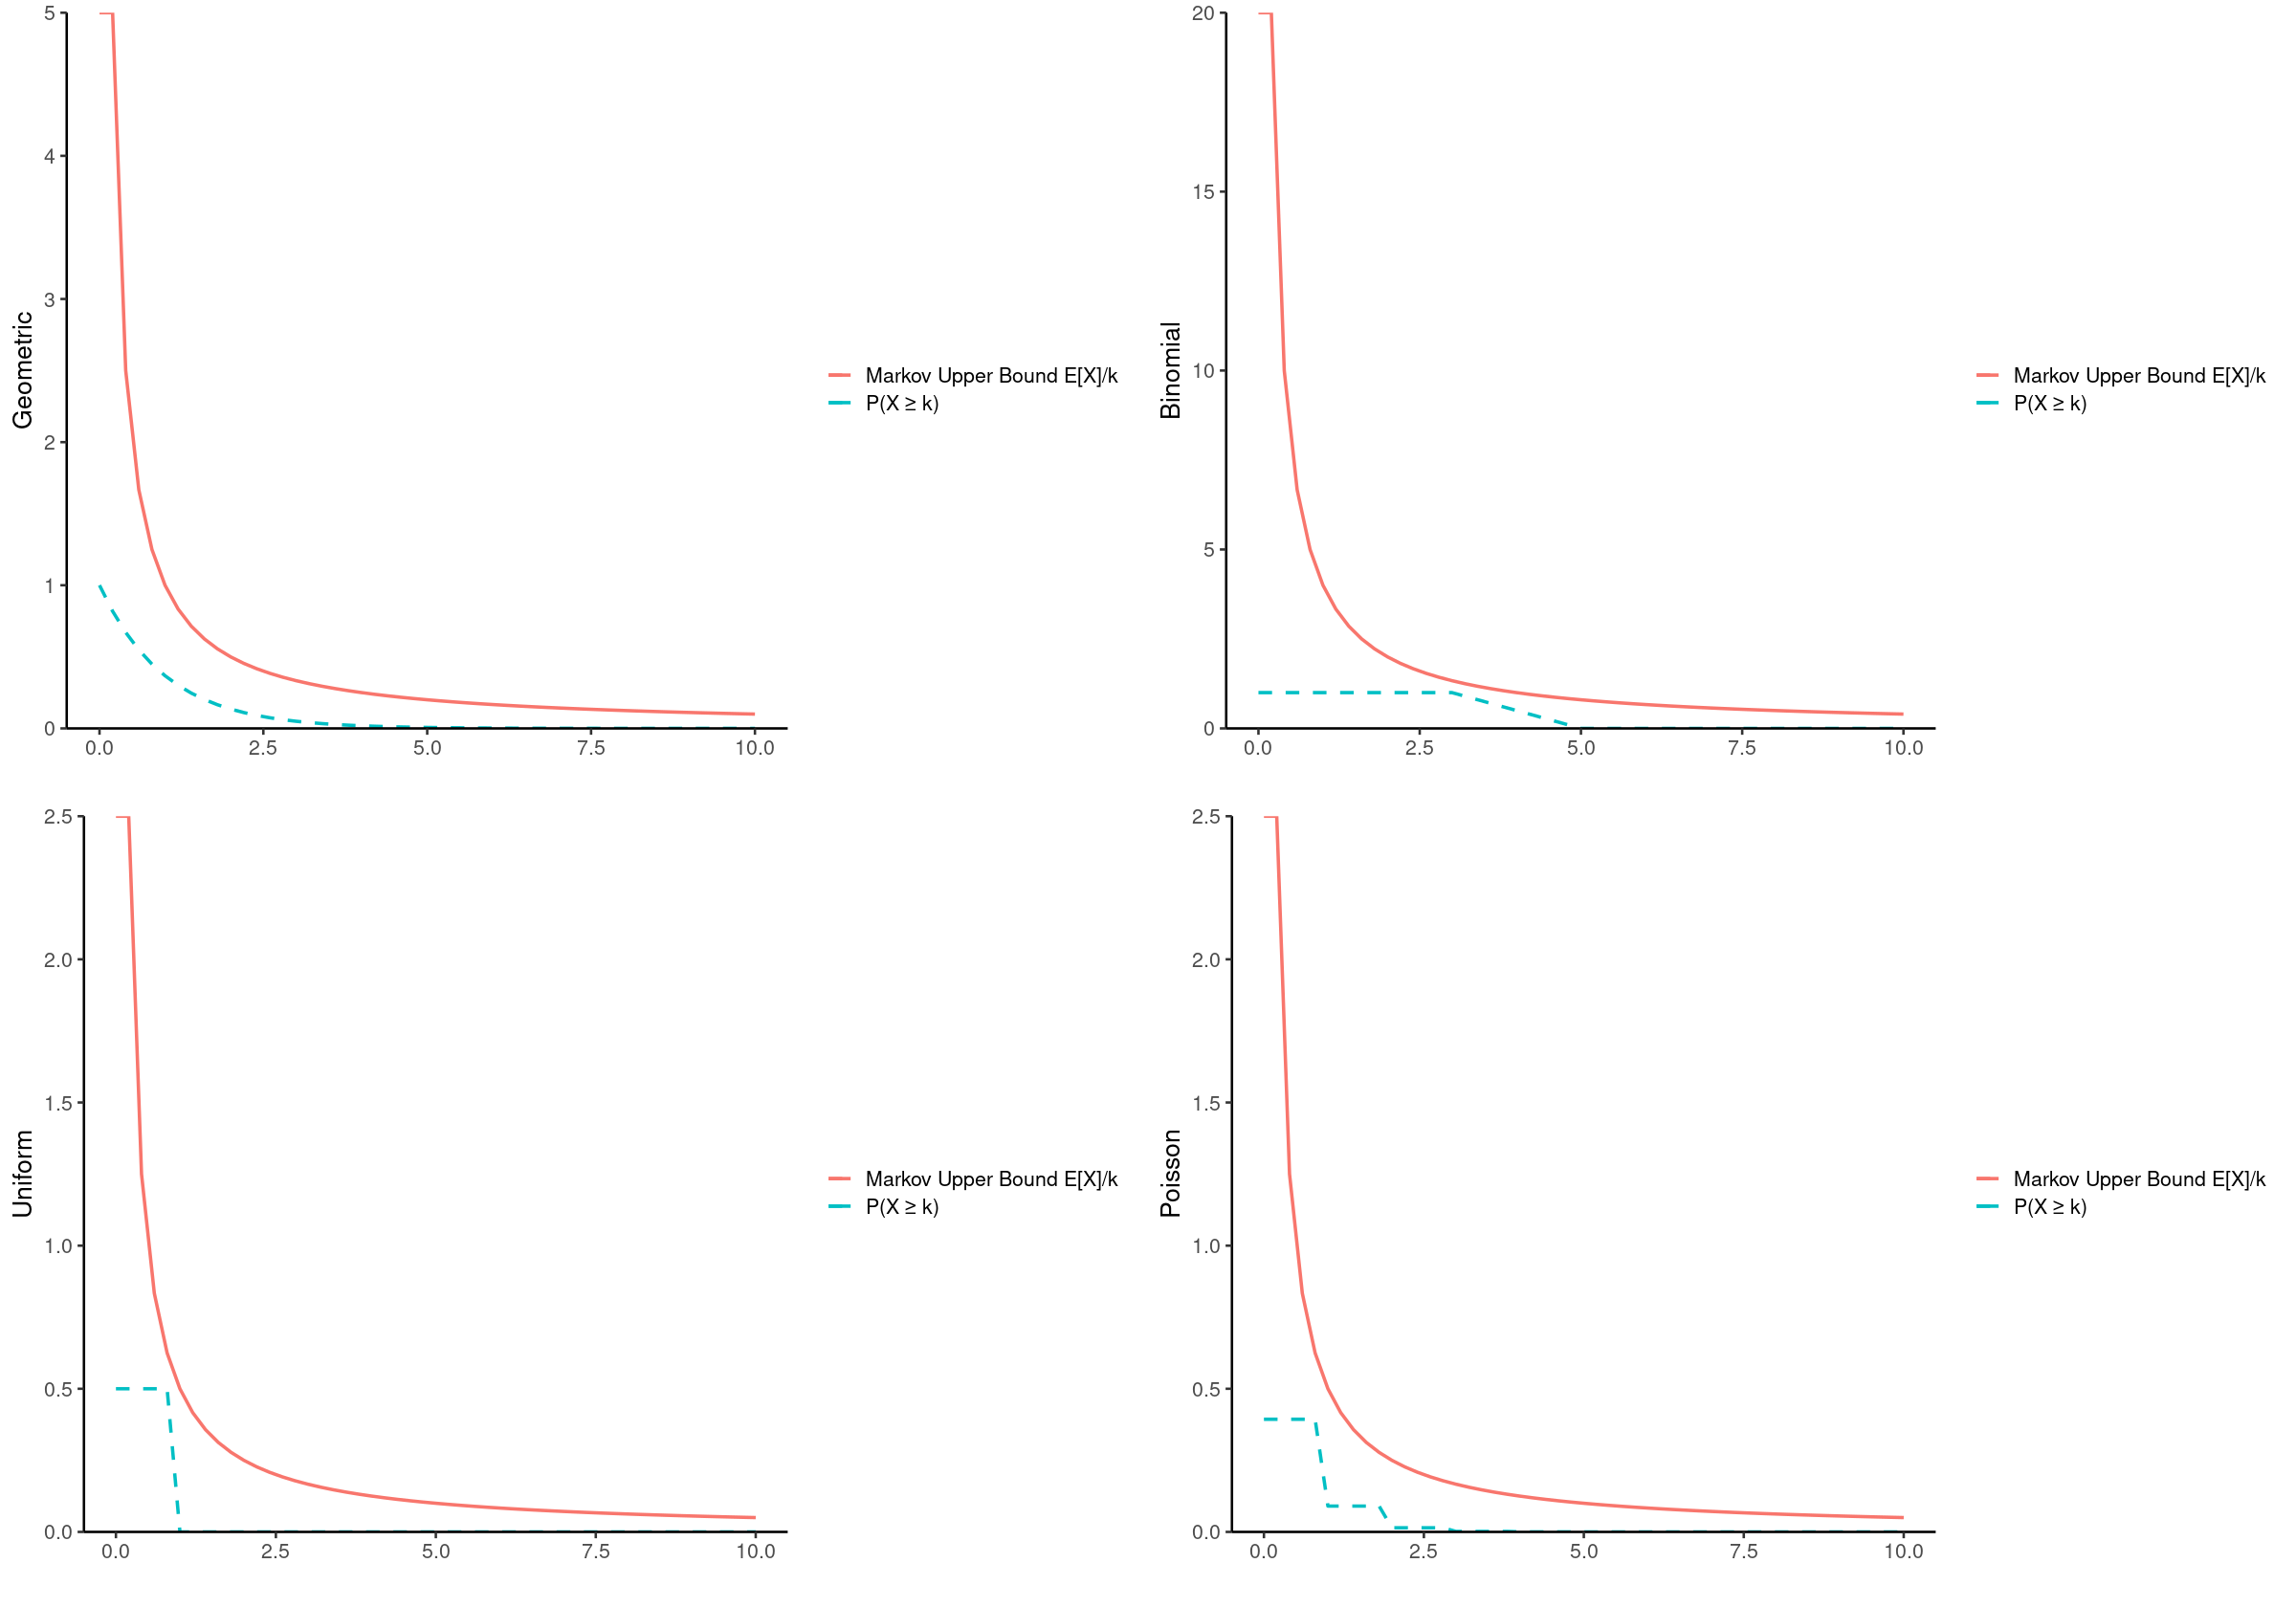

In [3]:
library("ggplot2")
library("ggpubr")

options(warn=-1)



markov_neq <- function(k, E){E/k}


g_exp <- Vectorize(function(k) {1- pexp(k, 1)})
g_unif <- Vectorize(function(k) {1- punif(k, 3, 5)} )
g_bin <-Vectorize( function(k) {1- pbinom(k, 1, 1/2)})  
g_pois <- Vectorize(function(k) {1- ppois(k, 1/2)} ) 




options(repr.plot.width=20, repr.plot.height=14)
k <-c(seq(0, 10, 0.2))
# Plot of exponential
df  <- data.frame(k=k, Gexp = g_exp(k), mark_exp = markov_neq(k, 1), 
                  Gunif = g_unif(k), mark_unif = markov_neq(k, 4), 
                  Gbin = g_bin(k), mark_bin = markov_neq(k, 1/2), 
                  Gpois = g_pois(k), mark_pois = markov_neq(k, 1/2))


exp_plot <- ggplot(df) +
            geom_line(aes(x=k, y= Gexp, color = "P(X ≥ k)"), linetype = "dashed", size = 1)+
            geom_line(aes(x=k, y= mark_exp, color = "Markov Upper Bound E[X]/k"), size = 1) +
            theme_classic(base_size = 16)+
            scale_x_continuous(name= "", expand = c(0.05, 0))+
            scale_y_continuous(name= "Geometric", expand = c(0, 0)) +
            expand_limits(y=0)+
            labs(y= NULL, color = " ")


unif_plot <- ggplot(df) +
            geom_line(aes(x=k, y= Gunif, color = "P(X ≥ k)"), linetype = "dashed", size = 1)+
            geom_line(aes(x=k, y= mark_unif, color = "Markov Upper Bound E[X]/k"), size = 1) +
            theme_classic(base_size = 16)+
            scale_x_continuous(name= "", expand = c(0.05, 0))+
            scale_y_continuous(name= "Binomial", expand = c(0, 0)) +
            expand_limits(y=0)+
            labs(y= NULL, color = " ")



bin_plot <- ggplot(df) +
            geom_line(aes(x=k, y= Gbin, color = "P(X ≥ k)"), linetype = "dashed", size = 1)+
            geom_line(aes(x=k, y= mark_bin, color = "Markov Upper Bound E[X]/k"), size = 1) +
            theme_classic(base_size = 16)+
            scale_x_continuous(name= "", expand = c(0.05, 0))+
            scale_y_continuous(name= "Uniform", expand = c(0, 0)) +
            expand_limits(y=0)+
            labs(y= NULL, color = " ")



pois_plot <- ggplot(df) +
            geom_line(aes(x=k, y= Gpois, color = "P(X ≥ k)"), linetype = "dashed", size = 1)+
            geom_line(aes(x=k, y= mark_pois, color = "Markov Upper Bound E[X]/k"), size = 1) +
            theme_classic(base_size = 16)+
            scale_x_continuous(name= "", expand = c(0.05, 0))+
            scale_y_continuous(name= "Poisson", expand = c(0, 0)) +
            expand_limits(y=0)+
            labs(y= NULL, color = " ")

ggarrange(exp_plot, unif_plot, bin_plot, pois_plot, nrow = 2, ncol = 2)




# Exercise 3 - Chebyshev’s inequality

In order to proceed we need to rewrite the inequality in a more manageable way. Note that: 

$$ 
P(|X-\mu| \leq k\sigma) = P(-k\sigma \leq X -\mu \leq k\sigma) \geq 1 - \frac{1}{k^{2}}
$$


$$ 
P(-k\sigma +\mu \leq X \leq k\sigma + \mu) = F_{X}(k\sigma + \mu) - F_{X}(-k\sigma + \mu)\geq 1 - \frac{1}{k^{2}}
$$

So the exercise is easily solved by calculating said quantity for the relevant distributions, which we then compare with $1-1/k^{2}$.

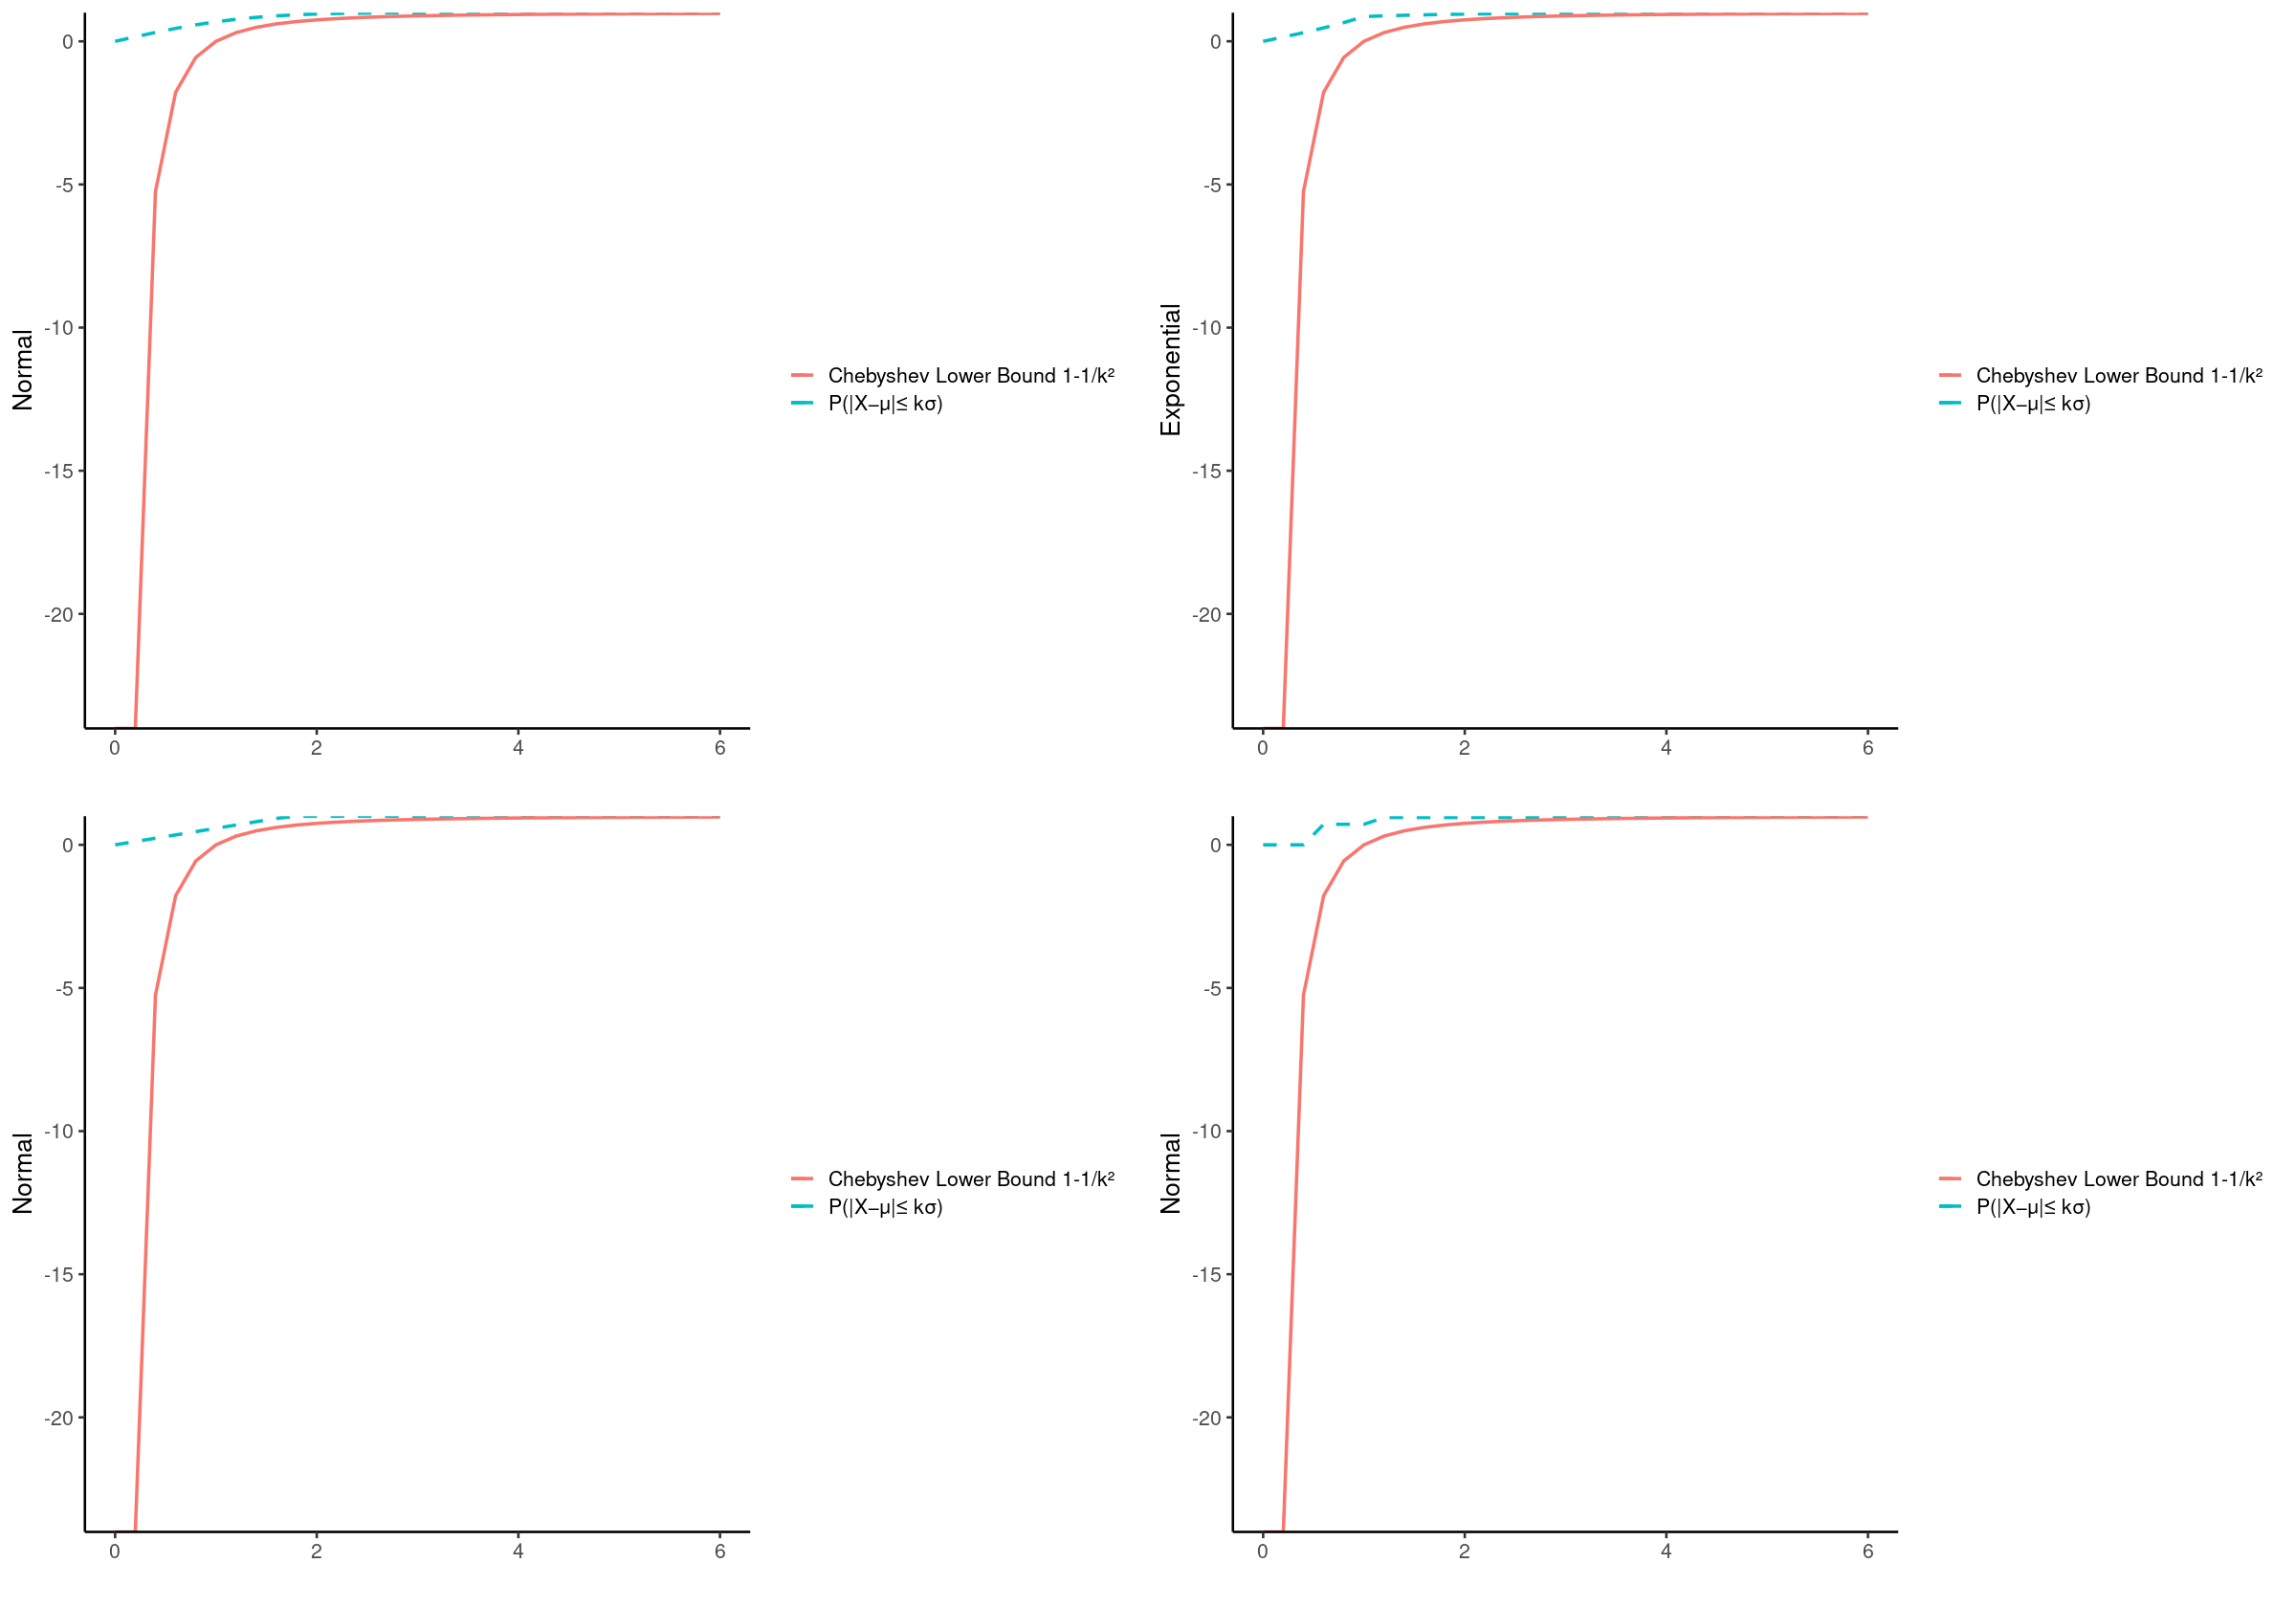

In [4]:
library("ggplot2")
library("ggpubr")

options(warn=-1)

cheb_neq <- function(k){1- (1/(k*k))}



cheb_normal <- Vectorize(function(k,sigma,nu) {pnorm(nu+(k*sigma), mean = nu, sd = sigma, log = FALSE)-pnorm(nu-(k*sigma), mean = nu, sd = sigma, log = FALSE)})

cheb_exp <- Vectorize(function(k, lambda) {pexp((k*1/lambda)+1/lambda, rate = lambda)-pexp((-k*1/lambda)+1/lambda, rate = lambda)})

cheb_unif <- Vectorize(function(k,low, high) {punif((k*(high-low)/sqrt(12))+(high+low)/2, low, high) - punif((-k*(high-low)/sqrt(12))+(high+low)/2, low, high)})

cheb_pois <- Vectorize(function(k,lambda) {ppois(k*sqrt(lambda)+lambda, lambda) - ppois(-k*sqrt(lambda)+lambda, lambda)})


options(repr.plot.width=20, repr.plot.height= 14)
k <-c(seq(0, 6, 0.2))
# Plot of exponential
df_Cheb  <- data.frame(k=k, quant_norm = cheb_normal(k,5,3), cheb_norm = cheb_neq(k),
                  quant_exp = cheb_exp(k, 1), cheb_exp = cheb_neq(k),
                  quant_unif = cheb_unif(k,1-sqrt(2), 1+sqrt(2)), cheb_unif = cheb_neq(k),
                  quant_pois = cheb_pois(k, 1/3), cheb_pois = cheb_neq(k))


norm_plot_Cheb <- ggplot(df_Cheb) +
            geom_line(aes(x=k, y= quant_norm, color = "P(|X−μ|≤ kσ)"), linetype = "dashed", size = 1)+
            geom_line(aes(x=k, y= cheb_norm, color = "Chebyshev Lower Bound 1-1/k²"), size = 1) +
            theme_classic(base_size = 16)+
            scale_x_continuous(name= "", expand = c(0.05, 0))+
            scale_y_continuous(name= "Normal", expand = c(0, 0)) +
            expand_limits(y=0)+
            labs(y= NULL, color = " ")

exp_plot_Cheb <- ggplot(df_Cheb) +
            geom_line(aes(x=k, y= quant_exp, color = "P(|X−μ|≤ kσ)"), linetype = "dashed", size = 1)+
            geom_line(aes(x=k, y= cheb_exp, color = "Chebyshev Lower Bound 1-1/k²"), size = 1) +
            theme_classic(base_size = 16)+
            scale_x_continuous(name= "", expand = c(0.05, 0))+
            scale_y_continuous(name= "Exponential", expand = c(0, 0)) +
            expand_limits(y=0)+
            labs(y= NULL, color = " ")


unif_plot_Cheb <- ggplot(df_Cheb) +
            geom_line(aes(x=k, y= quant_unif, color = "P(|X−μ|≤ kσ)"), linetype = "dashed", size = 1)+
            geom_line(aes(x=k, y= cheb_unif, color = "Chebyshev Lower Bound 1-1/k²"), size = 1) +
            theme_classic(base_size = 16)+
            scale_x_continuous(name= "", expand = c(0.05, 0))+
            scale_y_continuous(name= "Normal", expand = c(0, 0)) +
            expand_limits(y=0)+
            labs(y= NULL, color = " ")


pois_plot_Cheb <- ggplot(df_Cheb) +
            geom_line(aes(x=k, y= quant_pois, color = "P(|X−μ|≤ kσ)"), linetype = "dashed", size = 1)+
            geom_line(aes(x=k, y= cheb_pois, color = "Chebyshev Lower Bound 1-1/k²"), size = 1) +
            theme_classic(base_size = 16)+
            scale_x_continuous(name= "", expand = c(0.05, 0))+
            scale_y_continuous(name= "Normal", expand = c(0, 0)) +
            expand_limits(y=0)+
            labs(y= NULL, color = " ")

ggarrange(norm_plot_Cheb, exp_plot_Cheb, unif_plot_Cheb, pois_plot_Cheb, nrow = 2, ncol = 2)


# Exercise 4 - Six Boxes Toy Model : inference

Bayesian inference in its most readable format can be written as: 

$$
P(H | E ) = \frac{P(E|H) \cdot P(H)}{P(E)}
$$

where: 
1. $H$ stands for any hypothesis whose probability may be affected by data. In our case H is the probability of having picked a specific box. (thus we will have 6 equations, one for each box). $P(H)$ is the **prior** probability.


2. $P(H|E)$ is the **posterior** probability, it is the probability of $H$ given $E$. This is what we want to know, the value of this quantity is updated after every ball extraction. 


3. $P(E|H)$ is the probability of observing $E$ (the evidence) if the hypothesis $H$ is true and is sometimes called the **likelihood**.

### Write a program in R that: 

1. allows the user to insert the color of a randomly extracted box and
3. prints on the standard output the probability of selecting each box
4. plots the probability for each box as a function of the extraction step

In [5]:
# Define initial conditions 
p.E_H <- c(0,1/5, 2/5, 3/5, 4/5, 1)
prior <- rep(1/6, 6)
p.Ek <-sum(prior*p.E_H)


df <- data.frame(matrix(ncol=9, nrow=0))
df <- rbind(df, matrix(c(0,NA, prior, p.Ek), nrow=1))
df

V1,V2,V3,V4,V5,V6,V7,V8,V9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,NA,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.5


In [6]:
update_belief <- function(ex.ball, prior){
    
    #probability of extracting a white ball for each box
    p.E_H <- c(0,1/5, 2/5, 3/5, 4/5, 1)
    
    if (ex.ball == 0) {
        #define the normalization factor
        p.Ek <- sum(p.E_H * prior)
        
        #update the prior
        prior <- prior*p.E_H/p.Ek
        
    }
    
    if (ex.ball == 1) {
        #define normalization factor
        p.Ek <- sum( (1-p.E_H) * prior )
        #update the prior
        prior <- prior*(1-p.E_H)/p.Ek
        
    }
    res = list(prior, p.Ek)
    return (res)
}



In [7]:
ex.ball  <- 0 
counter <- 0

while(ex.ball != 2){
    
ex.ball <- readline(prompt="\n Insert label of ball or stop (white = 0, black = 1, stop experiment = 2): ")
if ( ex.ball == 2) {
        Sys.sleep(0.001)
        print("Experiment stopped")
        flush.console() #shows current output to console
        break
}
trial <- update_belief(ex.ball, prior)
prior <- trial[[1]]
p.Ek <- trial[[2]]
counter <- counter + 1
df <- rbind(df, c(counter, ex.ball, prior, p.Ek))
Sys.sleep(0.001)    
cat('Trial = ', counter,'P(H0) = ', prior[1], 'P(H1) = ', prior[2], 'P(H2) = ', prior[3], 'P(H3) = ', prior[4], 'P(H4) = ', prior[5], 'P(H5) = ', prior[6])
flush.console() #shows current output to console
}    

dat <- as.data.frame(sapply(df, as.numeric))



 Insert label of ball or stop (white = 0, black = 1, stop experiment = 2): 0
Trial =  1 P(H0) =  0 P(H1) =  0.06666667 P(H2) =  0.1333333 P(H3) =  0.2 P(H4) =  0.2666667 P(H5) =  0.3333333
 Insert label of ball or stop (white = 0, black = 1, stop experiment = 2): 1
Trial =  2 P(H0) =  0 P(H1) =  0.2 P(H2) =  0.3 P(H3) =  0.3 P(H4) =  0.2 P(H5) =  0
 Insert label of ball or stop (white = 0, black = 1, stop experiment = 2): 0
Trial =  3 P(H0) =  0 P(H1) =  0.08 P(H2) =  0.24 P(H3) =  0.36 P(H4) =  0.32 P(H5) =  0
 Insert label of ball or stop (white = 0, black = 1, stop experiment = 2): 1
Trial =  4 P(H0) =  0 P(H1) =  0.1538462 P(H2) =  0.3461538 P(H3) =  0.3461538 P(H4) =  0.1538462 P(H5) =  0
 Insert label of ball or stop (white = 0, black = 1, stop experiment = 2): 0
Trial =  5 P(H0) =  0 P(H1) =  0.06153846 P(H2) =  0.2769231 P(H3) =  0.4153846 P(H4) =  0.2461538 P(H5) =  0
 Insert label of ball or stop (white = 0, black = 1, stop experiment = 2): 1
Trial =  6 P(H0) =  0 P(H1) =  0

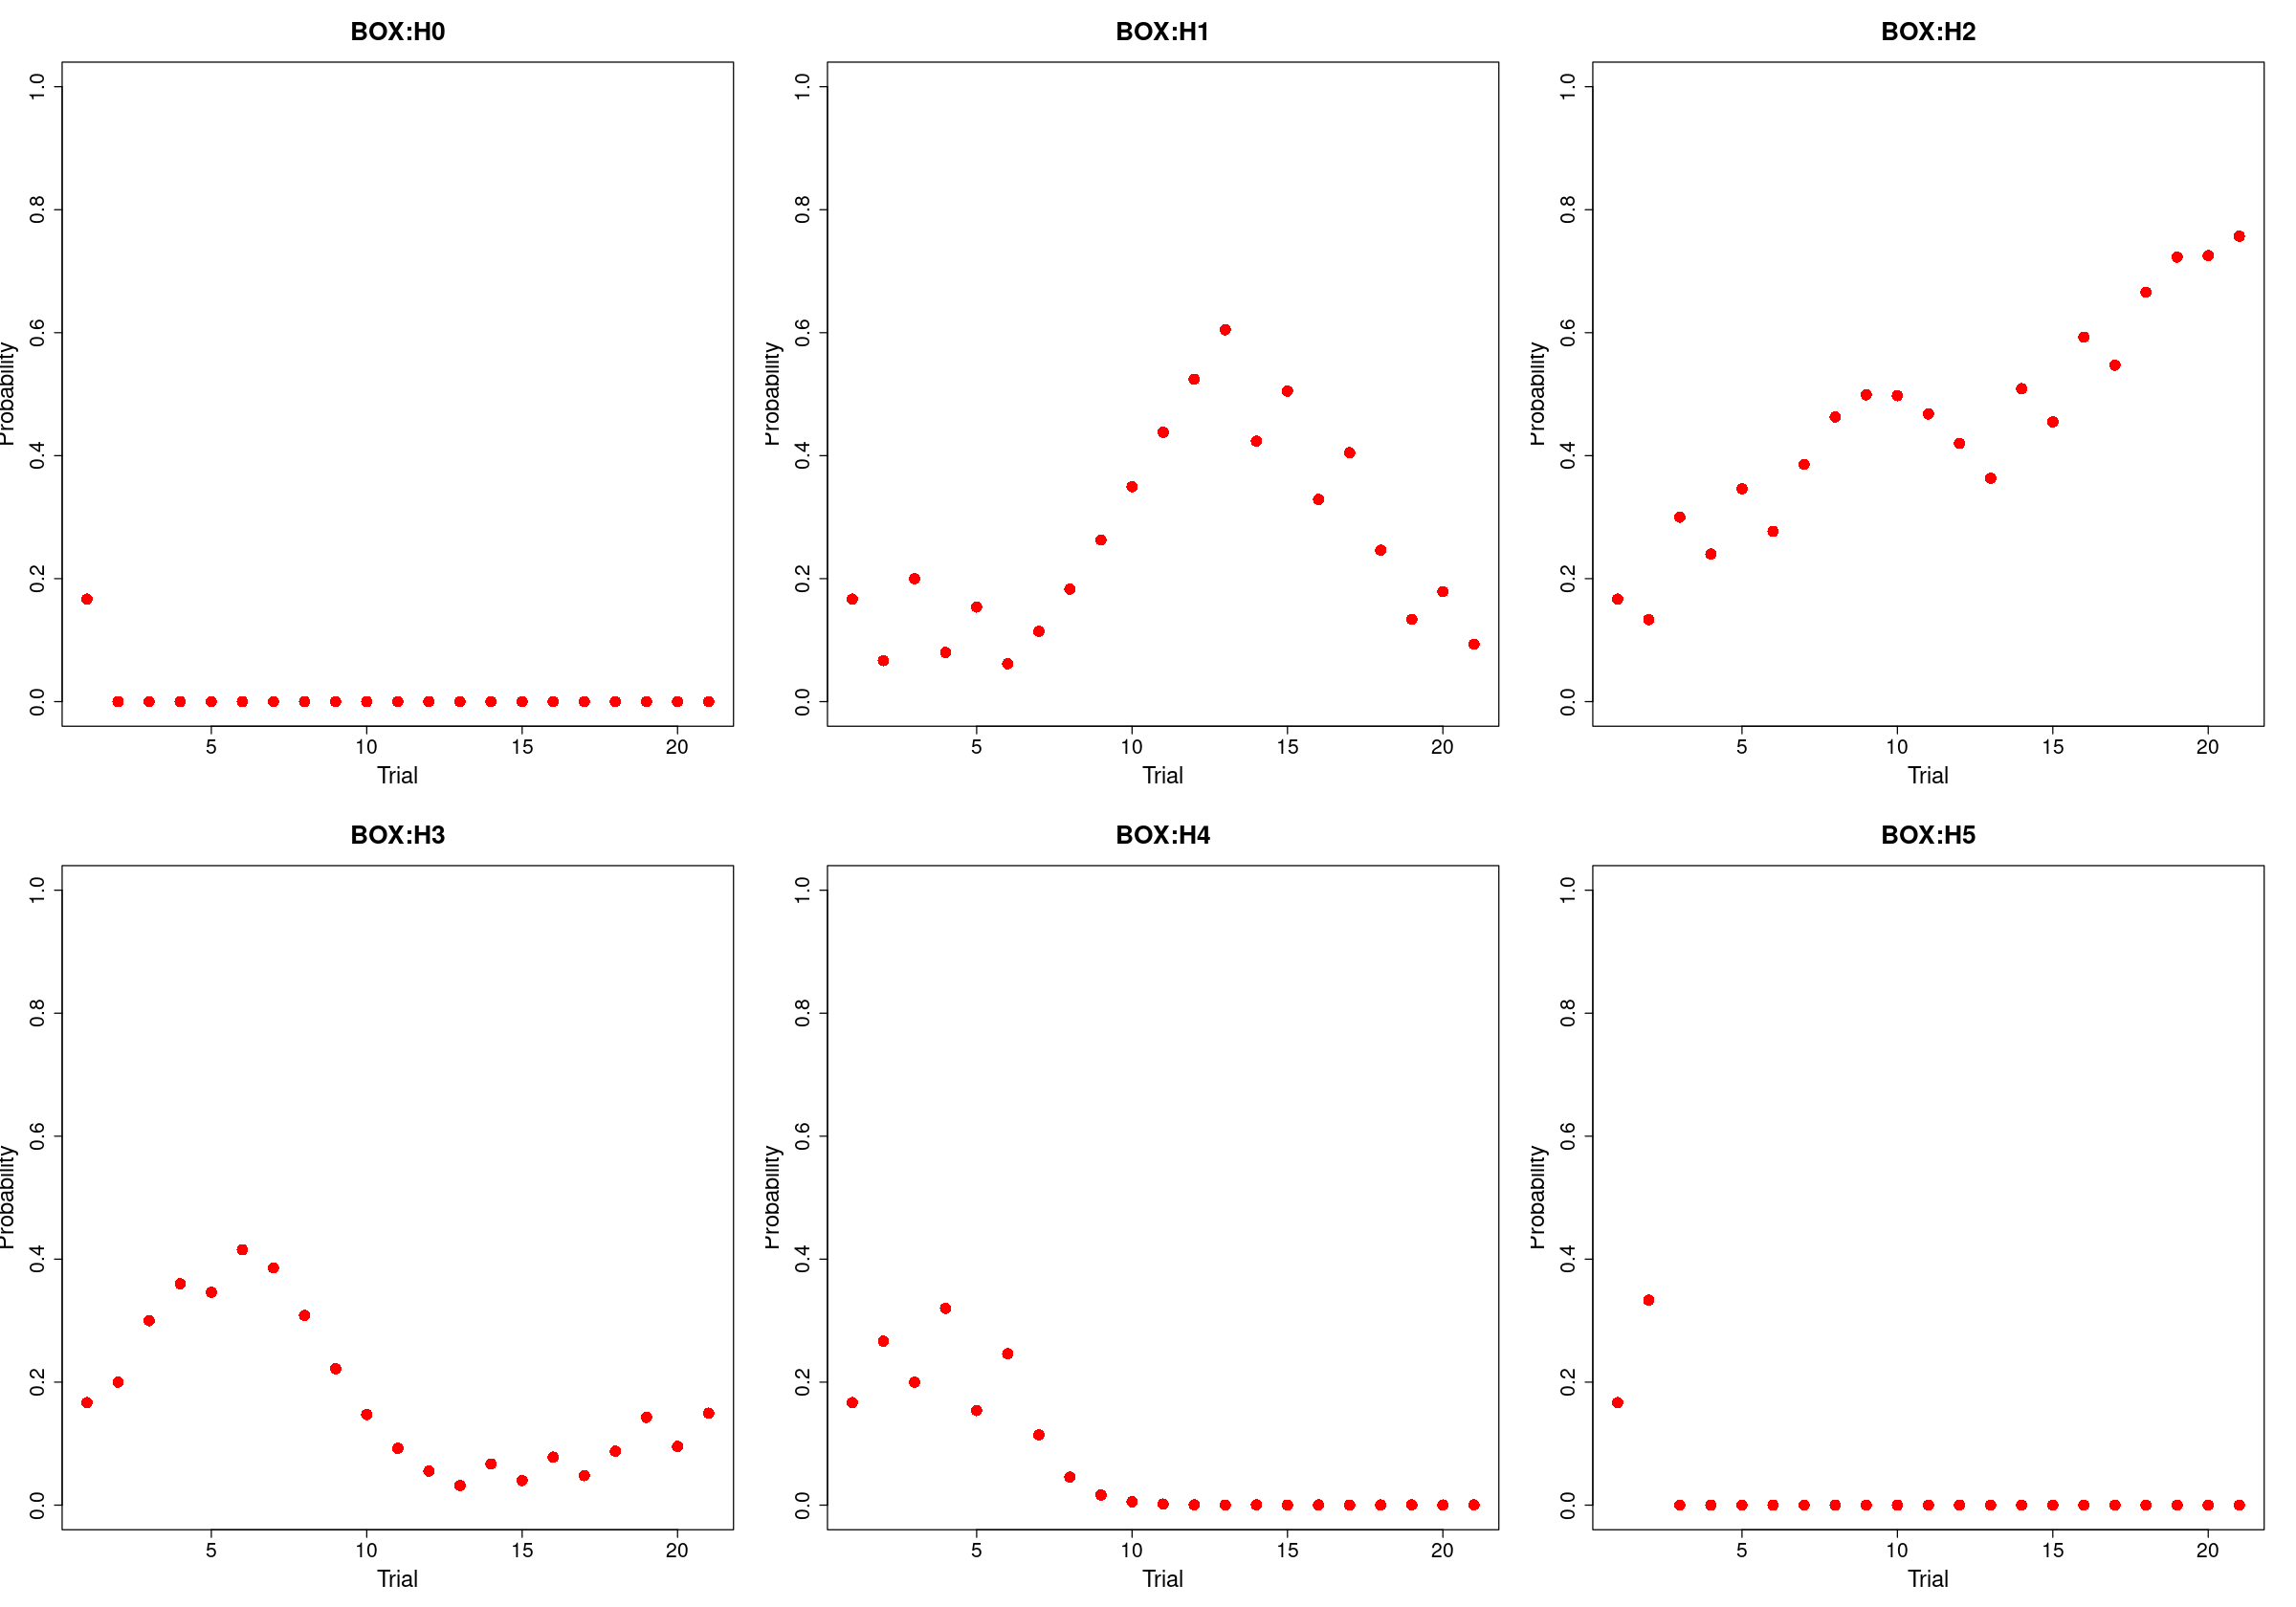

In [8]:
# plots the probability for each box as a function of the extraction step

par(mfrow=c(2,3))
options(repr.plot.width = 20, repr.plot.height = 14)
for (i in 0:5) {
    plot(dat[[i+3]], ylim=c(0,1), type = "p", col="red", 
         pch = 16, cex = 2, xlab = "Trial", ylab = "Probability", 
         cex.lab=1.8, cex.axis = 1.6,cex.main = 2, main = paste("BOX:H", i, sep = ""))
}



# Exercise 5 - Six Boxes Toy Model : simulation

Consider again the six boxes toy model of the previous exercise and write a simulation
program that:
1. selects a random box
2. makes random sampling from the box
3. prints on the standard output the probability of selecting each box
4. plots the probability for each box as a function of the number of trial

In [9]:
#Define initial state

p.E_H1 <- c(0,1/5, 2/5, 3/5, 4/5, 1)
prior1 <- rep(1/6, 6)
p.Ek1 <-sum(prior1*p.E_H1)


df1 <- data.frame(matrix(ncol=9, nrow=0))
df1 <- rbind(df1, matrix(c(0,NA, prior1, p.Ek1), nrow=1))
df1

V1,V2,V3,V4,V5,V6,V7,V8,V9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,NA,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.5


In [10]:
#Select random box 

sel <- sample(0:5, 1)
cat(paste("Box selected is H", sel, sep = ""), "\n")


#Make random sampling from the box, 0 is white 1 is black

counter1 <- 0 
for (i in 1:100) {
    ex.ball <- 1
    if (runif(1) <= sel/5) {
        ex.ball <- 0
    }
trial1 <- update_belief(ex.ball, prior1)
prior1 <- trial1[[1]]
p.Ek1 <- trial1[[2]]
counter1 <- counter1 + 1
df1 <- rbind(df1, c(counter1, ex.ball, prior1, p.Ek1))
Sys.sleep(0.001)
# prints on the standard output the probability of selecting each box
cat('Trial = ', counter1,'P(H0) = ', prior1[1], 'P(H1) = ', prior1[2], 'P(H2) = ', prior1[3], 'P(H3) = ', prior1[4], 'P(H4) = ', prior1[5], 'P(H5) = ', prior1[6], "\n")
flush.console() 
}
dat1 <- as.data.frame(sapply(df1, as.numeric))
    
    

Box selected is H2 
Trial =  1 P(H0) =  0.3333333 P(H1) =  0.2666667 P(H2) =  0.2 P(H3) =  0.1333333 P(H4) =  0.06666667 P(H5) =  0 
Trial =  2 P(H0) =  0 P(H1) =  0.2 P(H2) =  0.3 P(H3) =  0.3 P(H4) =  0.2 P(H5) =  0 
Trial =  3 P(H0) =  0 P(H1) =  0.08 P(H2) =  0.24 P(H3) =  0.36 P(H4) =  0.32 P(H5) =  0 
Trial =  4 P(H0) =  0 P(H1) =  0.1538462 P(H2) =  0.3461538 P(H3) =  0.3461538 P(H4) =  0.1538462 P(H5) =  0 
Trial =  5 P(H0) =  0 P(H1) =  0.2461538 P(H2) =  0.4153846 P(H3) =  0.2769231 P(H4) =  0.06153846 P(H5) =  0 
Trial =  6 P(H0) =  0 P(H1) =  0.3459459 P(H2) =  0.4378378 P(H3) =  0.1945946 P(H4) =  0.02162162 P(H5) =  0 
Trial =  7 P(H0) =  0 P(H1) =  0.1828571 P(H2) =  0.4628571 P(H3) =  0.3085714 P(H4) =  0.04571429 P(H5) =  0 
Trial =  8 P(H0) =  0 P(H1) =  0.2628337 P(H2) =  0.4989733 P(H3) =  0.2217659 P(H4) =  0.0164271 P(H5) =  0 
Trial =  9 P(H0) =  0 P(H1) =  0.3494881 P(H2) =  0.4976109 P(H3) =  0.1474403 P(H4) =  0.005460751 P(H5) =  0 
Trial =  10 P(H0) =  0 P(H

Trial =  73 P(H0) =  0 P(H1) =  0.02874768 P(H2) =  0.9711658 P(H3) =  8.653552e-05 P(H4) =  4.085291e-16 P(H5) =  0 
Trial =  74 P(H0) =  0 P(H1) =  0.01458282 P(H2) =  0.9852855 P(H3) =  0.0001316905 P(H4) =  8.289374e-16 P(H5) =  0 
Trial =  75 P(H0) =  0 P(H1) =  0.007344479 P(H2) =  0.9924565 P(H3) =  0.0001989734 P(H4) =  1.669941e-15 P(H5) =  0 
Trial =  76 P(H0) =  0 P(H1) =  0.009769369 P(H2) =  0.9900983 P(H3) =  0.0001323337 P(H4) =  5.553243e-16 P(H5) =  0 
Trial =  77 P(H0) =  0 P(H1) =  0.004908336 P(H2) =  0.9948922 P(H3) =  0.0001994617 P(H4) =  1.116026e-15 P(H5) =  0 
Trial =  78 P(H0) =  0 P(H1) =  0.006534191 P(H2) =  0.993333 P(H3) =  0.0001327661 P(H4) =  3.714258e-16 P(H5) =  0 
Trial =  79 P(H0) =  0 P(H1) =  0.008693704 P(H2) =  0.991218 P(H3) =  8.832227e-05 P(H4) =  1.23545e-16 P(H5) =  0 
Trial =  80 P(H0) =  0 P(H1) =  0.01155845 P(H2) =  0.9883828 P(H3) =  5.87131e-05 P(H4) =  4.106387e-17 P(H5) =  0 
Trial =  81 P(H0) =  0 P(H1) =  0.01535242 P(H2) =  0.9

Real box is H2

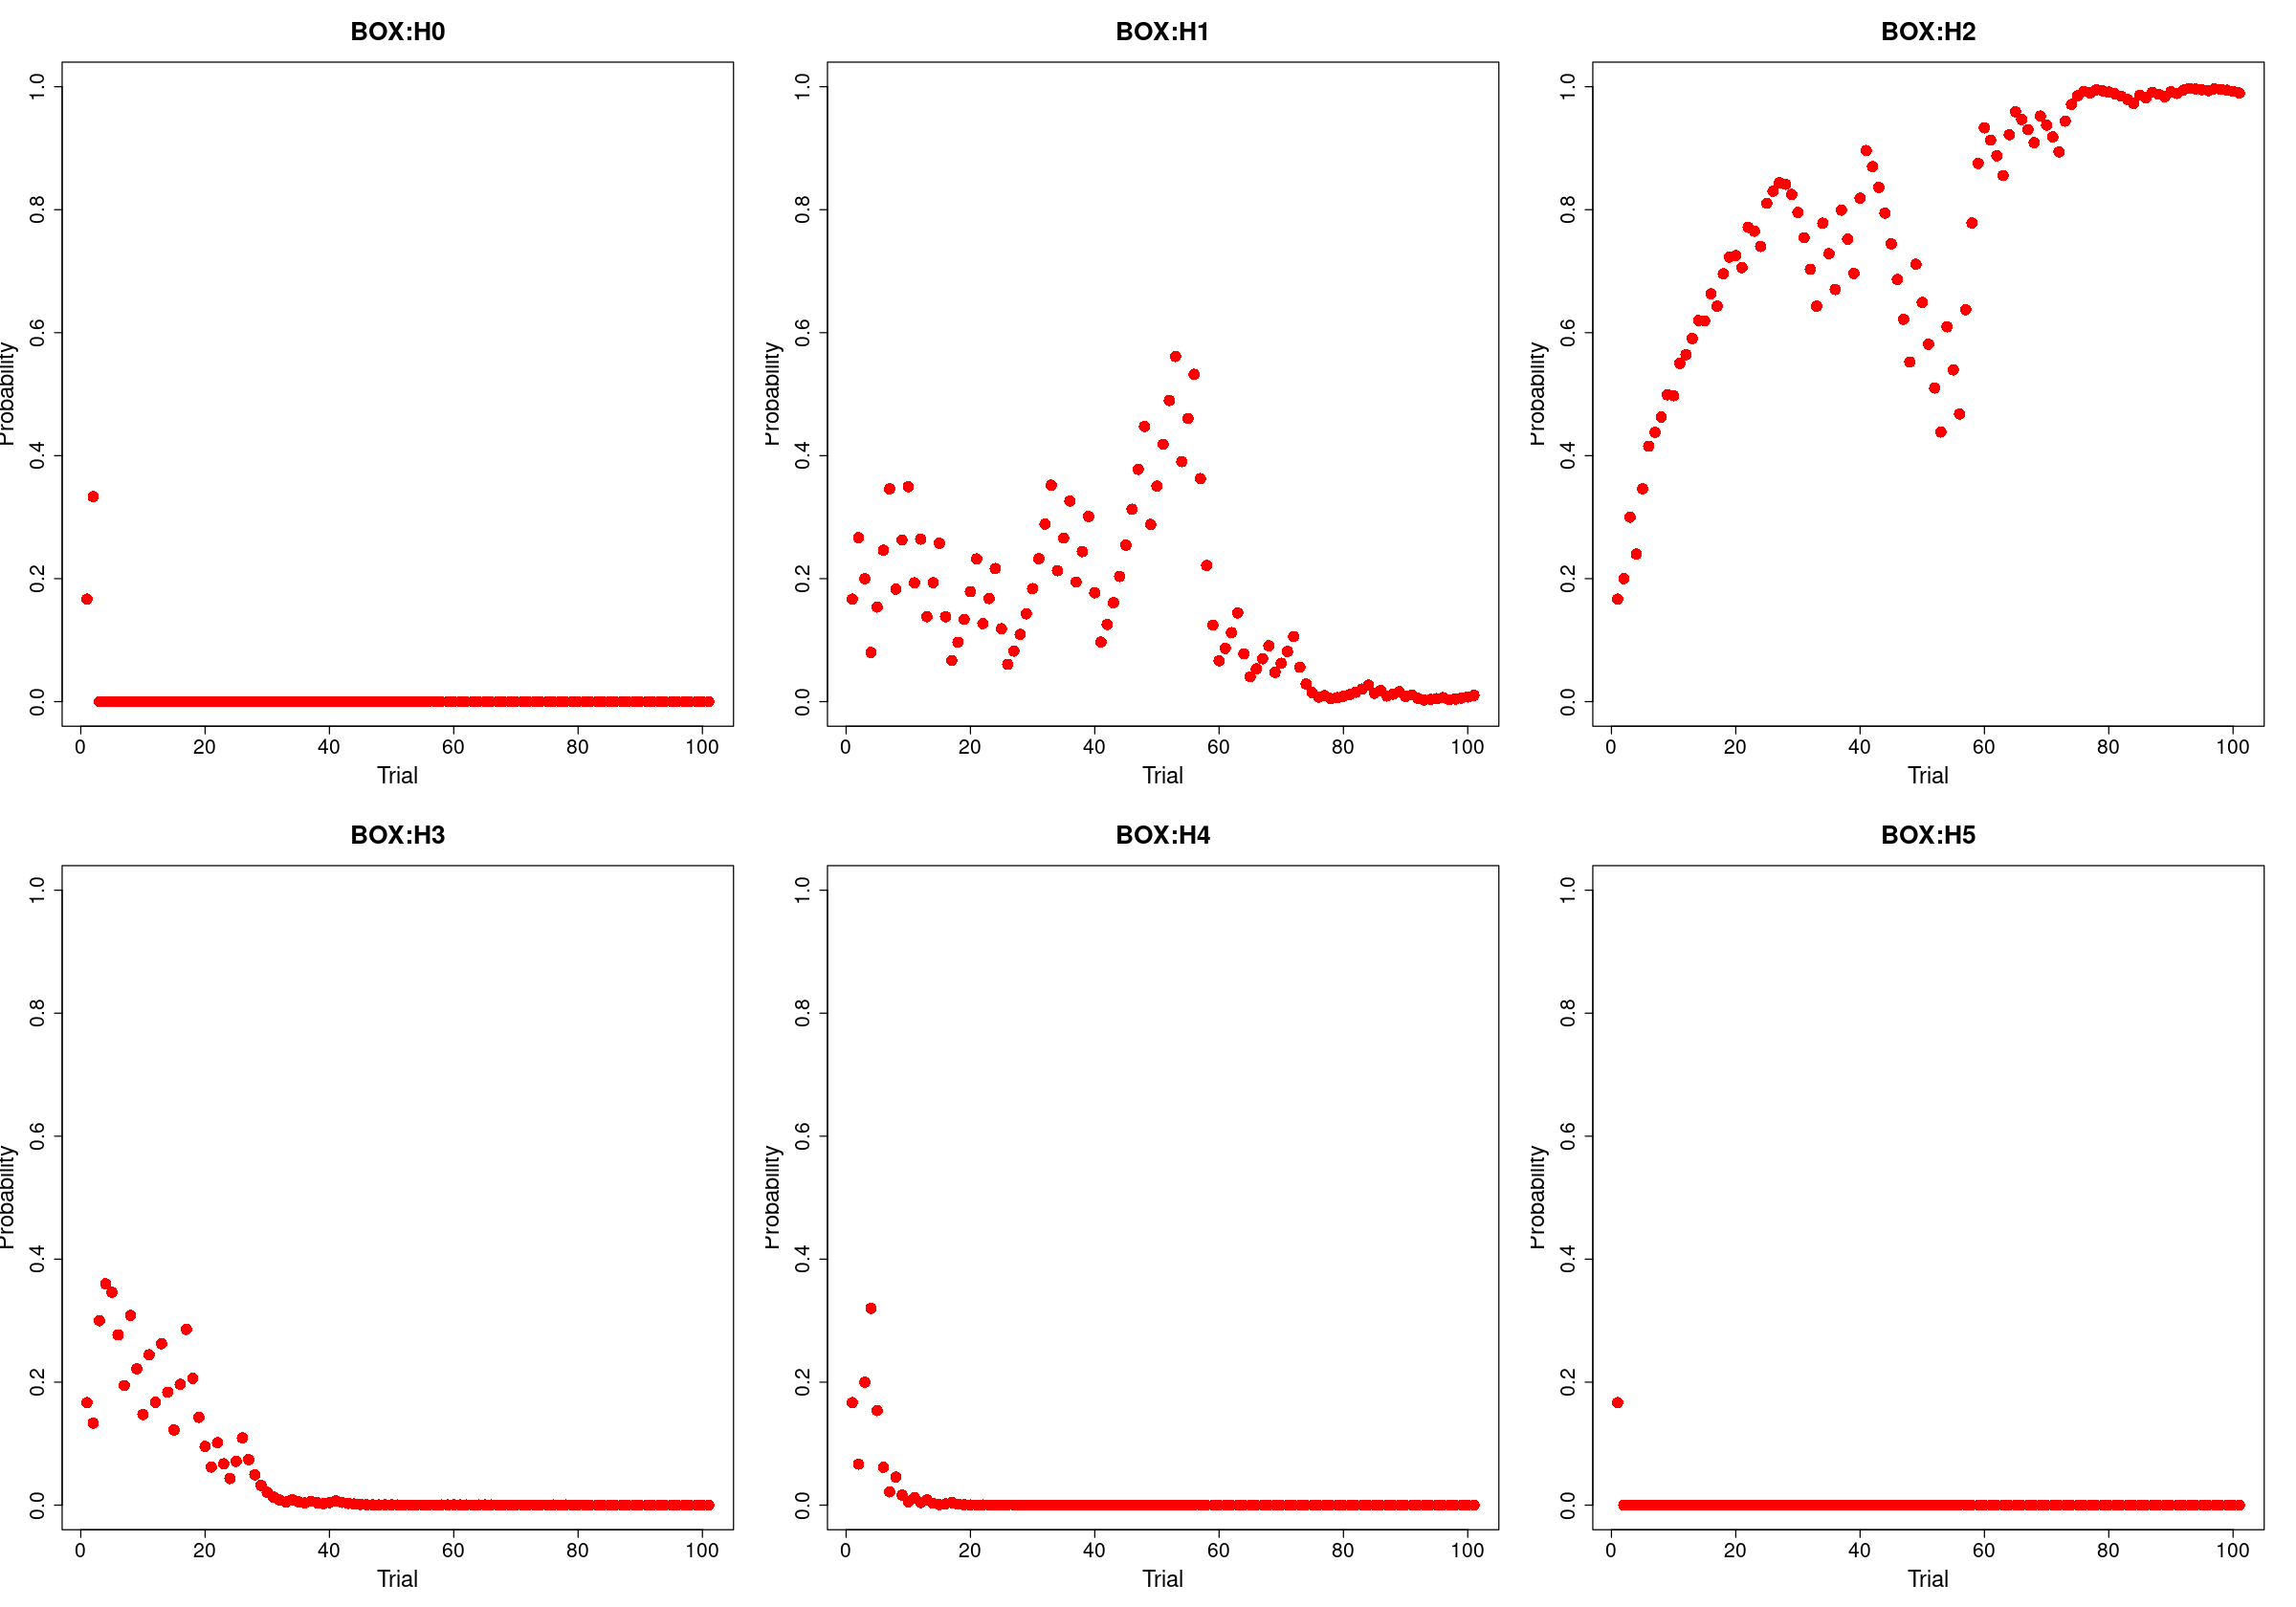

In [11]:
# Plots the probability for each box as a function of the number of trial

cat(paste("Real box is H", sel, sep = ""))

par(mfrow=c(2,3))
options(repr.plot.width = 20, repr.plot.height = 14)
for(i in (0:5)){
    plot(dat1[[i+3]], ylim=c(0,1), type = "p", col="red",
         pch = 16, cex = 2, xlab = "Trial", ylab = "Probability", 
         cex.lab=1.8, cex.axis = 1.6,cex.main = 2,  main = paste("BOX:H",i, sep = ""))
    }